In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Zad1
'''Zaimplementuj funkcję ransac według schematu przedstawionego na zajęciach'''

def ransac(X: np.ndarray, y: np.ndarray, num_samples: int, max_iters: int, threshold: float):
  best_model = 0
  best_ratio = 0

  for i in range(max_iters):
    rand = np.random.choice(len(X), num_samples)
    X_samples = X[rand]
    y_samples = y[rand]
    print("X_samples: ", X_samples)
    print("y_samples: ", y_samples)

    #model parameters from samples
    current_model = np.polyfit(X_samples, y_samples, 1)

    predicted_y = np.polyval(current_model, X)

    error = (predicted_y - y)**2

    p = np.sum(error < threshold)

    current_ratio = p / len(X)

    if current_ratio > best_ratio:
      best_model = current_model
      best_ratio = current_ratio

  return best_model

X_samples:  [5 1 9]
y_samples:  [ 5  1 58]
X_samples:  [8 6 4]
y_samples:  [ 8  6 33]
X_samples:  [1 5 9]
y_samples:  [ 1  5 58]
X_samples:  [10 10  1]
y_samples:  [10 10  1]
X_samples:  [8 6 8]
y_samples:  [8 6 8]
X_samples:  [ 5  2 10]
y_samples:  [ 5  2 10]
X_samples:  [7 2 6]
y_samples:  [7 2 6]
X_samples:  [ 9 10  6]
y_samples:  [58 10  6]
X_samples:  [ 8 10  6]
y_samples:  [ 8 10  6]
X_samples:  [10 10  6]
y_samples:  [10 10  6]
Best model:  [ 1.00000000e+00 -1.66070504e-15]


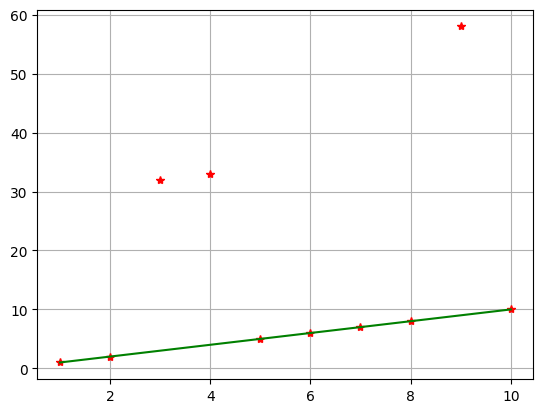

In [4]:
#TEST

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([1, 2, 32, 33, 5, 6, 7, 8, 58, 10])

best_model = ransac(X, y, num_samples=3, max_iters=10, threshold=0.5)
print("Best model: ", best_model)

ransac_fun = []
for i in range(len(X)):
  ransac_fun.append(best_model[0]*X[i]+best_model[1])

plt.figure()
plt.plot(X, y, "r*")
plt.plot(X, ransac_fun, "g-")
plt.grid(True)
plt.show()